In [2]:
!pip install scikit-fuzzy

In [3]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt

In [4]:
# Load dataset
data_path = "preprocessed_electric_vehicle_trip_data.csv"
data = pd.read_csv(data_path)

In [5]:
# Display dataset information
print("Dataset Overview:")
print(data.head())

Dataset Overview:
  vehID  step  acceleration(m/s²)  actualBatteryCapacity(Wh)    SoC(%)  \
0   EV0   101                0.75                   0.292495  1.000000   
1   EV0   102                0.75                   0.292448  0.999685   
2   EV0   103                0.75                   0.292373  0.999370   
3   EV0   104                0.75                   0.292271  0.998740   
4   EV1   104                0.85                   0.292478  0.999685   

   speed(m/s)  speedFactor  totalEnergyConsumed(Wh)  \
0    0.040074     0.202206                 0.000036   
1    0.080148     0.202206                 0.000143   
2    0.120221     0.202206                 0.000312   
3    0.160295     0.202206                 0.000543   
4    0.061446     0.355191                 0.000075   

   totalEnergyRegenerated(Wh)       lon       lat       alt  slope(º)  \
0                         0.0  0.009050  0.000040  0.924076  0.578218   
1                         0.0  0.008993  0.000159  0.925038 

In [6]:
# Define fuzzy variables
acceleration = ctrl.Antecedent(np.arange(-5, 5, 0.1), 'acceleration')
speed = ctrl.Antecedent(np.arange(0, 30, 0.1), 'speed')
energyConsumed = ctrl.Antecedent(np.arange(0, 50, 1), 'energyConsumed')
regenEfficiency = ctrl.Antecedent(np.arange(0, 100, 1), 'regenEfficiency')
SoC_change = ctrl.Consequent(np.arange(-10, 10, 0.1), 'SoC_change')




In [7]:
# Set defuzzification method to Centroid (default)
# SoC_change.defuzzify_method = 'centroid'

# OR, set it to Mean of Maximum (MoM)
SoC_change.defuzzify_method = 'mom'


In [8]:
# Define fuzzy membership functions
# acceleration['low'] = fuzz.trimf(acceleration.universe, [-5, -2.5, 0])
# acceleration['medium'] = fuzz.trimf(acceleration.universe, [-2, 0, 2])
# acceleration['high'] = fuzz.trimf(acceleration.universe, [0, 2.5, 5])

acceleration['low'] = fuzz.trimf(acceleration.universe, [-5, -3, -0.5])   # Shift medium connection
acceleration['medium'] = fuzz.trimf(acceleration.universe, [-2.5, 0, 2.5])  # Broaden range
acceleration['high'] = fuzz.trimf(acceleration.universe, [0.5, 3, 5])     # Shift start of high


speed['low'] = fuzz.trimf(speed.universe, [0, 5, 10])
speed['medium'] = fuzz.trimf(speed.universe, [8, 15, 22])
speed['high'] = fuzz.trimf(speed.universe, [20, 25, 30])

energyConsumed['low'] = fuzz.trimf(energyConsumed.universe, [0, 10, 20])
energyConsumed['medium'] = fuzz.trimf(energyConsumed.universe, [15, 25, 35])
energyConsumed['high'] = fuzz.trimf(energyConsumed.universe, [30, 40, 50])

regenEfficiency['low'] = fuzz.trimf(regenEfficiency.universe, [0, 25, 50])
regenEfficiency['medium'] = fuzz.trimf(regenEfficiency.universe, [40, 60, 80])
regenEfficiency['high'] = fuzz.trimf(regenEfficiency.universe, [70, 85, 100])

SoC_change['decrease'] = fuzz.trimf(SoC_change.universe, [-10, -5, 0])
SoC_change['stable'] = fuzz.trimf(SoC_change.universe, [-2, 0, 2])
SoC_change['increase'] = fuzz.trimf(SoC_change.universe, [0, 5, 10])

acceleration['very_high'] = fuzz.trimf(acceleration.universe, [4, 5, 6])


In [9]:
# Define fuzzy rules
rule1 = ctrl.Rule(acceleration['high'] & energyConsumed['high'], SoC_change['decrease'])
rule2 = ctrl.Rule(regenEfficiency['high'], SoC_change['increase'])
rule3 = ctrl.Rule(speed['low'] & acceleration['low'], SoC_change['stable'])
rule4 = ctrl.Rule(energyConsumed['medium'], SoC_change['decrease'])
rule5 = ctrl.Rule(regenEfficiency['medium'], SoC_change['stable'])

In [10]:
# Control System
SoC_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
SoC_simulation = ctrl.ControlSystemSimulation(SoC_ctrl)

In [11]:
# Test with sample input
SoC_simulation.input['acceleration'] = 5
SoC_simulation.input['speed'] = 30
SoC_simulation.input['energyConsumed'] = 40
SoC_simulation.input['regenEfficiency'] = 60


Predicted SoC change: -3.552713678800501e-14


C:\Users\omkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


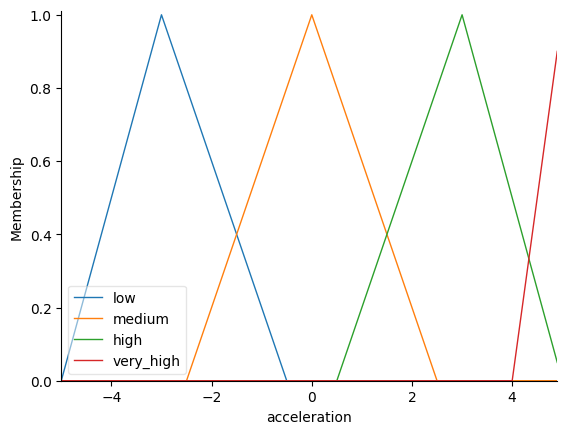

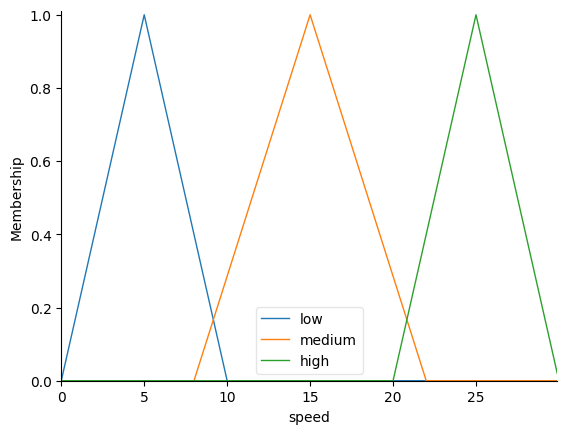

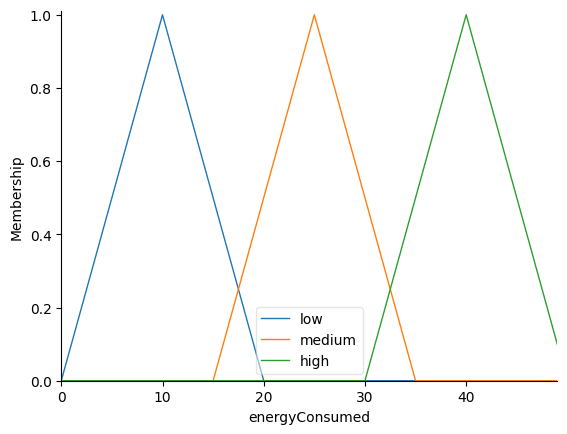

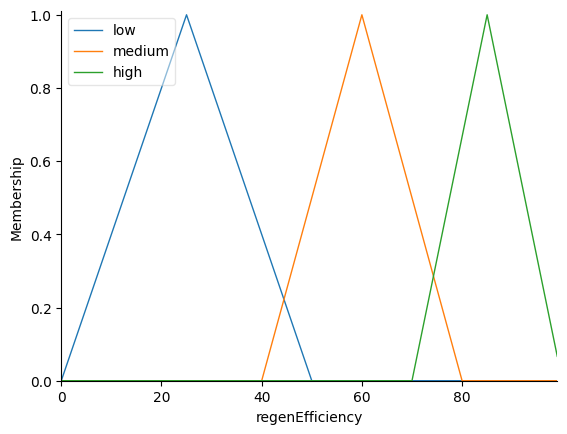

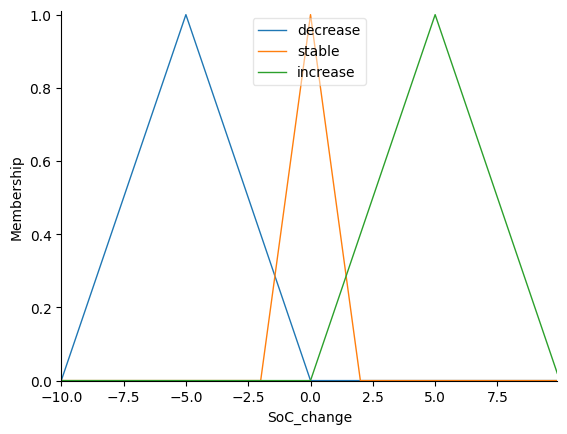

In [12]:
# Compute output
SoC_simulation.compute()
print(f"Predicted SoC change: {SoC_simulation.output['SoC_change']}")

# Plot membership functions
acceleration.view()
speed.view()
energyConsumed.view()
regenEfficiency.view()
SoC_change.view()
plt.show()


Dataset Overview:
  vehID  step  acceleration(m/s²)  actualBatteryCapacity(Wh)    SoC(%)  \
0   EV0   101                0.75                   0.292495  1.000000   
1   EV0   102                0.75                   0.292448  0.999685   
2   EV0   103                0.75                   0.292373  0.999370   
3   EV0   104                0.75                   0.292271  0.998740   
4   EV1   104                0.85                   0.292478  0.999685   

   speed(m/s)  speedFactor  totalEnergyConsumed(Wh)  \
0    0.040074     0.202206                 0.000036   
1    0.080148     0.202206                 0.000143   
2    0.120221     0.202206                 0.000312   
3    0.160295     0.202206                 0.000543   
4    0.061446     0.355191                 0.000075   

   totalEnergyRegenerated(Wh)       lon       lat       alt  slope(º)  \
0                         0.0  0.009050  0.000040  0.924076  0.578218   
1                         0.0  0.008993  0.000159  0.925038 

C:\Users\omkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


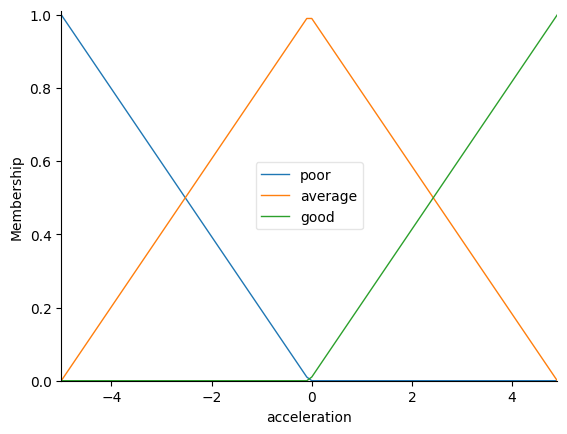

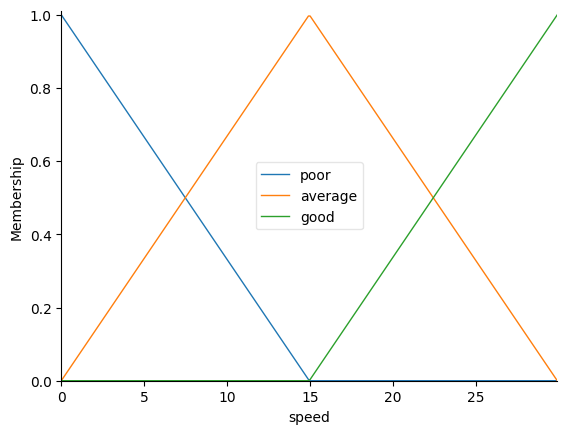

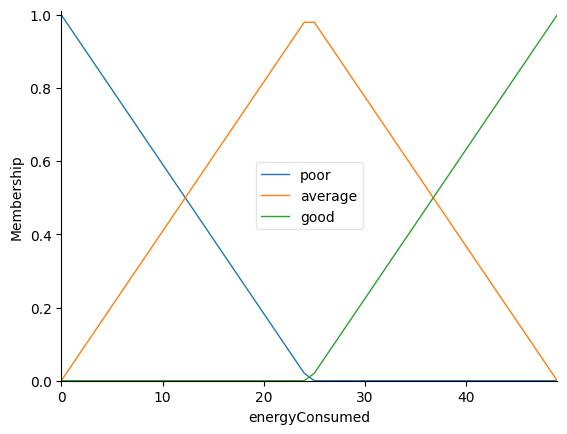

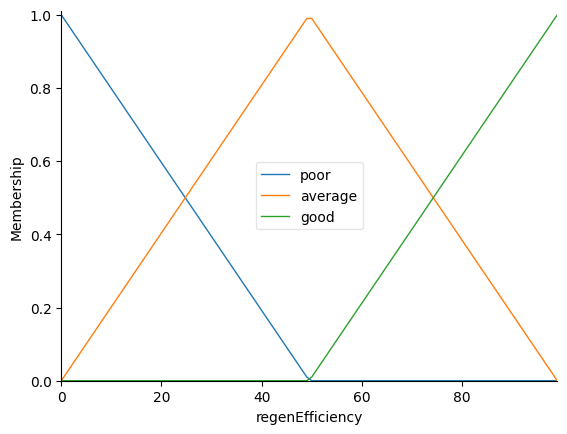

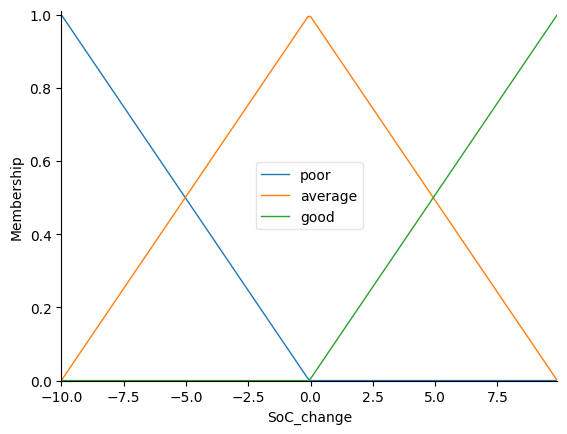

In [20]:
!pip install scikit-fuzzy
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
data_path = "preprocessed_electric_vehicle_trip_data.csv"
data = pd.read_csv(data_path)

# Display dataset information
print("Dataset Overview:")
print(data.head())

# Define fuzzy variables
acceleration = ctrl.Antecedent(np.arange(-5, 5, 0.1), 'acceleration')
speed = ctrl.Antecedent(np.arange(0, 30, 0.1), 'speed')
energyConsumed = ctrl.Antecedent(np.arange(0, 50, 1), 'energyConsumed')
regenEfficiency = ctrl.Antecedent(np.arange(0, 100, 1), 'regenEfficiency')
SoC_change = ctrl.Consequent(np.arange(-10, 10, 0.1), 'SoC_change')

# Define fuzzy membership functions
acceleration.automf(3)
speed.automf(3)
energyConsumed.automf(3)
regenEfficiency.automf(3)
SoC_change.automf(3)

# Define fuzzy rules
rule1 = ctrl.Rule(acceleration['poor'] | speed['poor'] | energyConsumed['good'], SoC_change['poor'])
rule2 = ctrl.Rule(acceleration['average'] & speed['average'] & energyConsumed['average'], SoC_change['average'])
rule3 = ctrl.Rule(acceleration['good'] | speed['good'] | regenEfficiency['good'], SoC_change['good'])
rule4 = ctrl.Rule(energyConsumed['poor'] & regenEfficiency['good'], SoC_change['good'])

# Create fuzzy control system
system = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
SoC_simulation = ctrl.ControlSystemSimulation(system)

# Rename dataset columns to match fuzzy variable names
column_mapping = {
    'acceleration(m/s²)': 'acceleration',
    'speed(m/s)': 'speed',
    'totalEnergyConsumed(Wh)': 'energyConsumed',
    'totalEnergyRegenerated(Wh)': 'regenEfficiency'
}
data = data.rename(columns=column_mapping)

# Compute output for each row in the dataset
predicted_soc_changes = []
for index, row in data.iterrows():
    # Set input values to the simulation instance
    SoC_simulation.input['acceleration'] = row['acceleration']
    SoC_simulation.input['speed'] = row['speed']
    SoC_simulation.input['energyConsumed'] = row['energyConsumed']
    SoC_simulation.input['regenEfficiency'] = row['regenEfficiency']
    
    # Compute fuzzy output
    SoC_simulation.compute()
    predicted_soc_changes.append(SoC_simulation.output['SoC_change'])

# Convert to numpy array
predicted_soc_changes = np.array(predicted_soc_changes)

# Extract actual SoC values
actual_soc = data['SoC(%)'].values

# Ensure dimensions match
min_length = min(len(actual_soc), len(predicted_soc_changes))
actual_soc = actual_soc[:min_length]
predicted_soc_changes = predicted_soc_changes[:min_length]

# Compute evaluation metrics
rmse = np.sqrt(mean_squared_error(actual_soc, predicted_soc_changes))
mae = mean_absolute_error(actual_soc, predicted_soc_changes)
r2 = r2_score(actual_soc, predicted_soc_changes)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

# Plot membership functions
acceleration.view()
speed.view()
energyConsumed.view()
regenEfficiency.view()
SoC_change.view()
plt.show()


Dataset Overview:
  vehID  step  acceleration(m/s²)  actualBatteryCapacity(Wh)    SoC(%)  \
0   EV0   101                0.75                   0.292495  1.000000   
1   EV0   102                0.75                   0.292448  0.999685   
2   EV0   103                0.75                   0.292373  0.999370   
3   EV0   104                0.75                   0.292271  0.998740   
4   EV1   104                0.85                   0.292478  0.999685   

   speed(m/s)  speedFactor  totalEnergyConsumed(Wh)  \
0    0.040074     0.202206                 0.000036   
1    0.080148     0.202206                 0.000143   
2    0.120221     0.202206                 0.000312   
3    0.160295     0.202206                 0.000543   
4    0.061446     0.355191                 0.000075   

   totalEnergyRegenerated(Wh)       lon       lat       alt  slope(º)  \
0                         0.0  0.009050  0.000040  0.924076  0.578218   
1                         0.0  0.008993  0.000159  0.925038 

C:\Users\omkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


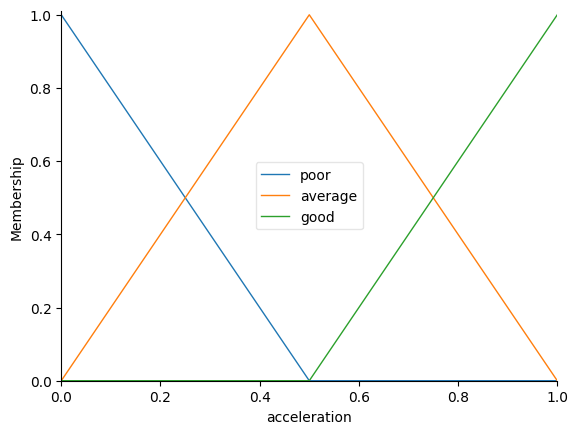

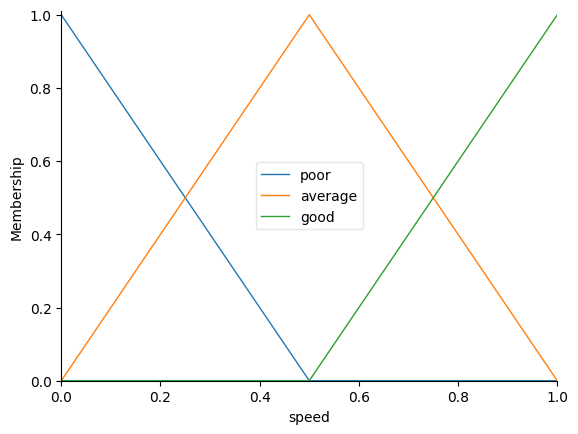

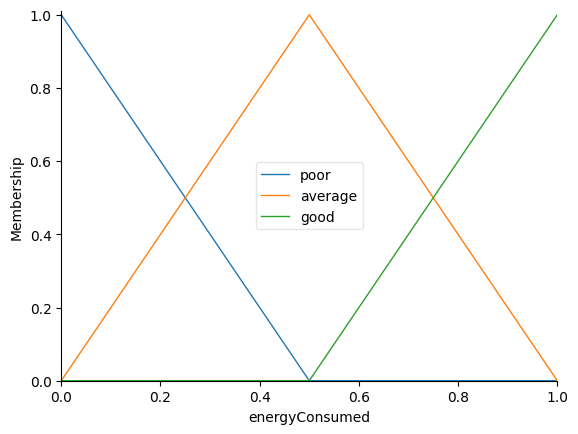

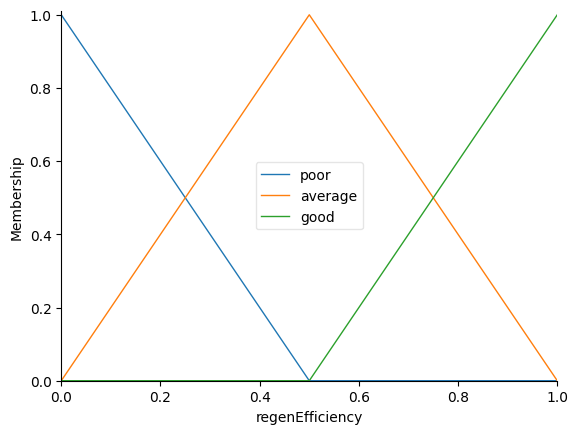

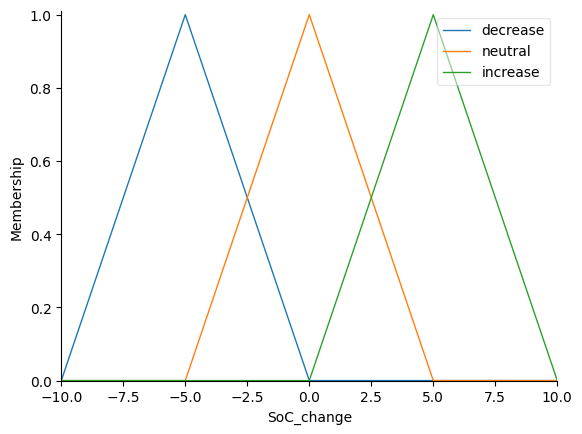

In [27]:
!pip install scikit-fuzzy
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
data_path = "preprocessed_electric_vehicle_trip_data.csv"
data = pd.read_csv(data_path)

# Display dataset information
print("Dataset Overview:")
print(data.head())

# Standardize column names to remove spaces
data.columns = data.columns.str.strip()

# Normalize input variables
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

data['acceleration'] = normalize(data['acceleration(m/s²)'])
data['speed'] = normalize(data['speed(m/s)'])
data['energyConsumed'] = normalize(data['totalEnergyConsumed(Wh)'])
data['regenEfficiency'] = normalize(data['totalEnergyRegenerated(Wh)'])

# Define fuzzy variables with finer granularity
acceleration = ctrl.Antecedent(np.linspace(0, 1, 5), 'acceleration')
speed = ctrl.Antecedent(np.linspace(0, 1, 5), 'speed')
energyConsumed = ctrl.Antecedent(np.linspace(0, 1, 5), 'energyConsumed')
regenEfficiency = ctrl.Antecedent(np.linspace(0, 1, 5), 'regenEfficiency')
SoC_change = ctrl.Consequent(np.linspace(-10, 10, 5), 'SoC_change')

# Define fuzzy membership functions manually for better control
acceleration.automf(3)
speed.automf(3)
energyConsumed.automf(3)
regenEfficiency.automf(3)

SoC_change['decrease'] = fuzz.trimf(SoC_change.universe, [-10, -5, 0])
SoC_change['neutral'] = fuzz.trimf(SoC_change.universe, [-2, 0, 2])
SoC_change['increase'] = fuzz.trimf(SoC_change.universe, [0, 5, 10])

# Improve fuzzy rules with more nuanced conditions
rule1 = ctrl.Rule(acceleration['poor'] & speed['poor'] & energyConsumed['good'], SoC_change['decrease'])
rule2 = ctrl.Rule(acceleration['average'] & speed['average'] & energyConsumed['average'], SoC_change['neutral'])
rule3 = ctrl.Rule(acceleration['good'] | speed['good'] | regenEfficiency['good'], SoC_change['increase'])
rule4 = ctrl.Rule(energyConsumed['poor'] & regenEfficiency['good'], SoC_change['increase'])
rule5 = ctrl.Rule(speed['good'] & regenEfficiency['average'], SoC_change['neutral'])
rule6 = ctrl.Rule(acceleration['poor'] & regenEfficiency['poor'], SoC_change['decrease'])

# Create fuzzy control system with enhanced rules
system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
SoC_simulation = ctrl.ControlSystemSimulation(system)

# Compute output for each row in the dataset
predicted_soc_changes = []
for index, row in data.iterrows():
    # Set input values to the simulation instance
    SoC_simulation.input['acceleration'] = row['acceleration']
    SoC_simulation.input['speed'] = row['speed']
    SoC_simulation.input['energyConsumed'] = row['energyConsumed']
    SoC_simulation.input['regenEfficiency'] = row['regenEfficiency']
    
    # Compute fuzzy output
    SoC_simulation.compute()
    predicted_soc_changes.append(SoC_simulation.output['SoC_change'])

# Convert to numpy array
predicted_soc_changes = np.array(predicted_soc_changes)

# Extract actual SoC values
actual_soc = data['SoC(%)'].values

# Ensure dimensions match
min_length = min(len(actual_soc), len(predicted_soc_changes))
actual_soc = actual_soc[:min_length]
predicted_soc_changes = predicted_soc_changes[:min_length]

# Compute evaluation metrics
rmse = np.sqrt(mean_squared_error(actual_soc, predicted_soc_changes))
mae = mean_absolute_error(actual_soc, predicted_soc_changes)
r2 = r2_score(actual_soc, predicted_soc_changes)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

# Plot membership functions
acceleration.view()
speed.view()
energyConsumed.view()
regenEfficiency.view()
SoC_change.view()
plt.show()

In [28]:
print(data.columns)

Index(['vehID', 'step', 'acceleration(m/s²)', 'actualBatteryCapacity(Wh)',
       'SoC(%)', 'speed(m/s)', 'speedFactor', 'totalEnergyConsumed(Wh)',
       'totalEnergyRegenerated(Wh)', 'lon', 'lat', 'alt', 'slope(º)',
       'completedDistance(km)', 'mWh', 'remainingRange(km)', 'time',
       'energyConsumptionRate(Wh/km)', 'acceleration', 'speed',
       'energyConsumed', 'regenEfficiency'],
      dtype='object')
